## TP Boosting et Bagging
Ecrire les fonctions
* compute_new_weights(X,y,stump,W) qui calcule les nouveau poids W, en fonction d'un classifieur stump
* boosting(X,y,niter) qui fasse 'niter' iterations de boosting
* Implementez une fonction bagging(X,y,niter)


In [15]:
%matplotlib inline

### Fonctions de manipulation des Stumps

In [22]:
# load iris dataset
import matplotlib.pyplot as plt
import numpy as np

def load_iris_onevsall( pos_class=0 ):
    """
    Charge la base iris
    >>> X,y = load_iris_onevsall()
    """
    from sklearn import datasets
    iris = datasets.load_iris()
    X = iris.data[:,:2]
    y = (iris.target == pos_class).astype(float)*2-1
    return X,y


def stump_predict(X,stump):
    """
    Renvoie les prediction d'un stump sur des exemples X:
    >>> stump_predict([[3,-2]],'x0 > 1')
    [1]
    >>> stump_predict([[3,-2]],'x0 > 4.5')
    [-1]
    >>> stump_predict([[3,-2]],'x1 < 0')
    [1]
    >>> stump_predict([[3,-2]],'x1 > 0')
    [-1]
    """
    X = np.array(X)
    # extraire les parametres du stump
    stump = stump.replace(' ','').lower()
    try:
        (coord,th),sign = stump.split('>'),'>'
    except ValueError:
        (coord,th),sign = stump.split('<'),'<'
    th = float(th)

    if coord == 'x0' and sign == '>':
        return np.where(X[:,0] > th,1,-1)
    elif coord == 'x0' and sign == '<':
        return np.where(X[:,0] < th,1,-1)
    elif coord == 'x1' and sign == '>':
        return np.where(X[:,1] > th,1,-1)
    elif coord == 'x1' and sign == '<':
        return np.where(X[:,1] < th,1,-1)
    else:
        raise Exception("mauvais parametres d'appel pour la fonction stump_predict")


def stump_errors(X,y,stump):
    """
    renvoie une liste contenant des 1 si les exemples sont mal classe par stump, 0 sinon
    >>> stump_error([[3,-2],[1,4]],[1,-1],'x1 > 0')
    """
    pred = stump_predict(X,stump)    
    return np.array([float(pi != yi) for pi,yi in zip(pred,y)])


def find_best_stump(X,y,D=None):
    """
    enumere tous les stumps possibles,
    calcule leur erreur,
    et renvoie le meilleur stump
    """
    stump_list = []
    error_list = []
    if D is None: D = np.ones(len(y))
    
    for i,xi in enumerate(['x0','x1']):
        for sign in ['<','>']:
            for th in np.unique(X[:,i]).astype(str):

                stump = xi+sign+th
                errors = stump_errors(X,y,stump)

                stump_list.append(stump)
                error_list.append( np.dot( errors , D ) )

    return stump_list[np.argmin(error_list)]



def stumplist_predict(X,stumps):
    P = [stump_predict(X,stump) for stump in stumps]
    P = np.sum(P,axis=0)
    return (P >= 0).astype(int)*2-1


### Fonctions d'affichage

In [17]:
def mesh_predictions(predfun,boundaries=None,step=200):
    if boundaries is None:
        xminmax,yminmax = plt.gca().get_xlim() , plt.gca().get_ylim()
    else:
        xminmax,yminmax = boundaries
    xlist = np.linspace(*xminmax, num=step)
    ylist = np.linspace(*yminmax, num=step)
    X, Y = np.meshgrid(xlist, ylist)
    XX = np.array([X.ravel(), Y.ravel()]).T
    Z = predfun(XX)
    Z = Z.reshape(X.shape)
    return X,Y,Z

def plot_separator(predfun,step=350,**kwargs):
    XX,YY,ZZ = mesh_predictions(predfun,step=step)
    mini,maxi = np.min(ZZ),np.max(ZZ)
    if not np.isclose(mini,maxi):
        plt.contour(XX,YY,ZZ,**kwargs)

def scatter(X,y):
    plt.scatter(X[:,0],X[:,1],c=-y,s=50,cmap='rainbow')


def plot_stumplist(X,y,stumps):
    scatter(X,y)
    def stumplist_pred(X):
        return stumplist_predict(X,stumps)
    plot_separator(stumplist_pred)
    scatter(X,y)

### Test de ces fonctions

meilleur stump :  x0<5.5
prediction de ce stump en (6,3): [-1]
prediction de ce stump en (3,2): [1]


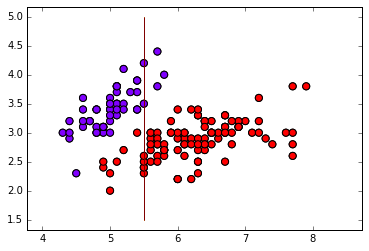

In [25]:
# Load Iris
X,y = load_iris_onevsall()

s = find_best_stump(X,y)
print('meilleur stump : ',s)

print('prediction de ce stump en (6,3):',stumplist_predict( [[6,3]],[s]) )
print('prediction de ce stump en (3,2):',stumplist_predict( [[3,2]],[s]) )

plot_stumplist(X,y,[s])

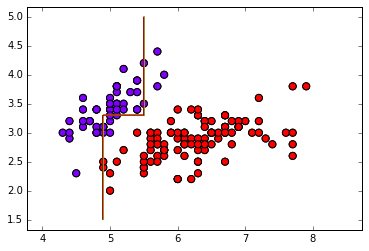

In [26]:
stump_list = ['x0<5.5','x1>3.3','x0<4.9']
plot_stumplist(X,y,stump_list)